# Police dataset

### Given the police data, we attempt answering the following questions...

### Import necessary libraries

In [1]:
import pandas as pd

### Read csv file into a DataFrame

In [2]:
data = pd.read_csv('police_data.csv')
data.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


### Identify number of rows and columns

In [3]:
rows = data.shape[0]
columns = data.shape[1]
print('Number of rows is {}'.format(rows))
print('Number of columns is {}'.format(columns))

Number of rows is 65535
Number of columns is 15


### Inedtify the type of each column

In [4]:
data.dtypes

stop_date              object
stop_time              object
country_name          float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

### Question 1 (Data Cleaning): 
### a) Find all Null Values in the dataset. 

In [5]:
data.isnull().sum()

stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

We have 65535 rows in the dataset and we have the same number of missing values in the column 'country_name'

In [6]:
data.loc[data.isna().any(axis=1)].head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


data.isnull().sum() is a great help. We see the 3rd column is totally missing...

### b) Remove the missing column

In [7]:
datanew = data.drop(['country_name'], axis=1)
datanew.loc[datanew.isna().any(axis=1)].head(10)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
5,3/23/2005,9:45,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
6,4/1/2005,17:30,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
7,6/6/2005,13:20,F,1986.0,19.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
8,7/13/2005,10:15,M,1970.0,35.0,Black,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
9,7/13/2005,15:45,M,1970.0,35.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


### Question 2: For Speeding, were men or women stopped more often ? 

In [8]:
data = datanew.copy()

data2 = data.loc[data['violation'] == 'Speeding']
data2['driver_gender'].value_counts()

M    25517
F    11686
Name: driver_gender, dtype: int64

### Question 3: Does gender affect who gets searched during a stop ?

In [9]:
data3 = data.loc[data['search_conducted'] == True]
data3['driver_gender'].value_counts()

M    2113
F     366
Name: driver_gender, dtype: int64

We would like to know in how many case search was conducted in the whole data (regardless of gender)

In [10]:
data['search_conducted'].value_counts()

False    63056
True      2479
Name: search_conducted, dtype: int64

Of 2479 cases in which search was conducted, 366 were women...

### Question 4: What is the mean stop_duration ?

In [11]:
data['stop_duration'].value_counts()

0-15 Min     47379
16-30 Min    11448
30+ Min       2647
2                1
Name: stop_duration, dtype: int64

In [12]:
data4 = data.copy()
data4['stop_duration'] = data4['stop_duration'].map({'0-15 Min': 7.5, '16-30 Min': 24, '30+ Min': 45})
data4['stop_duration'].value_counts()

7.5     47379
24.0    11448
45.0     2647
Name: stop_duration, dtype: int64

In [13]:
data4['stop_duration'].mean()

12.187420698181345

### Additional question: in the stop_duration column, one value is 2. Can you remove that specific row?

In [14]:
aa = data.index[data['stop_duration'] == '2'].tolist()[0]
aa

55873L

In [15]:
data[aa:aa + 1]

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
55873,1/23/2012,11:17,M,1960.0,52.0,Black,Other Traffic Violation,Moving violation,False,NaN,Arrest Passenger,True,2,False


In [16]:
data2 = data.drop([aa], axis=0).reset_index()
data2.shape


(65534, 15)

Note that one row is deleted

### Question 5: Compare the age distributions for each violation.

In [17]:
data5 = data.groupby('violation')['driver_age'].mean().reset_index()
data5

,violation,driver_age
0,Equipment,31.682957
1,Moving violation,36.736443
2,Other,40.362381
3,Registration/plates,32.656696
4,Seat belt,30.333333
5,Speeding,33.262581


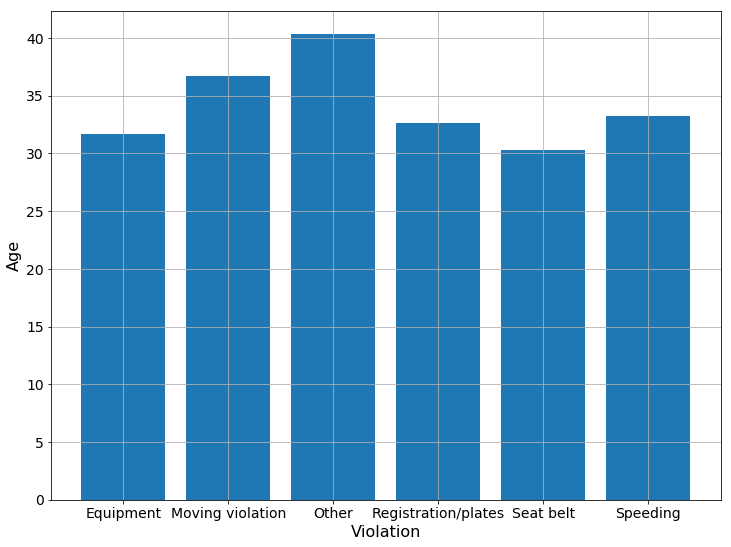

In [21]:
import matplotlib.pyplot as plt
x = data5['violation']
y = data5['driver_age']
plt.bar(x, y)
plt.xlabel('Violation', size=16)
plt.ylabel('Age', size=16)
plt.xticks(x, size=14)
plt.yticks(size=14)
plt.grid()

plt.rcParams['figure.figsize'] = (12, 9)
plt.show()